In [ ]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns

sns.set_style("white")

from pprint import pprint
from config import api_key

#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

In [ ]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)

first_championID_list_gold_DF

In [105]:
platinum_summonerId_list

['b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y',
 'HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ',
 'u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-',
 'mV-w51K_z-T73eU3RktA3fLABBTpTVSZboKfXeUwrVZyne4l',
 '45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW',
 'KEbyRB6ic7pQwFODe_gXZEbQDutrvp1WRLvIrAu661HEM0vE',
 'ODV8HRD3A6e3yoTGLW5FEHSD6m5LehwBKXiVdllqTGuVbTLt',
 'LC6QwpXOWn1nIEYNFp9ssSiy2PXBJ72PomLf7SjZbcwNb28F',
 'qucRi6-Z9xdC0Ix-lhkLm3O69uwF66vqXDPArr6Ih0RrAq6G',
 'fRY_fN9anaF66HjI4ROaprn7ScTsFUjZXqHw9KjriSJMrwW-',
 '4q-BbjXST7vtKsVup6QoL_0tprRmBQb4WNs7HcqwAQAap14k',
 'LQXyvr3n5b5jWZ6xlPKP1OQIS-Ft-8Xjwag1Z5Fh_V5PXeVc',
 'l6vj0ljrEC2J2rB_QWlpjAnW9gKFuXkEnnjICn2tl_qUh87N',
 'mqvmTJNM3zjHiV7wh3utKIHHa8imUpLXhPxt1f0WN-l2s57l',
 '5343LTgZhgIc24QPwIaUcUkfZF8kNhjcB4Zzaruw1Kd0W4tK',
 'evd7KHSXQ6W-an5dh814-Md5ZaW4SPH3BJsSWy8dvdls1cBH',
 'YfDc_FsQ5O0VHzhmdvNQh4IMDdeAshvn4g7KWfieC0-Z91we',
 'lTJpJGAk8nT4mQzlDv_MNSQpa-vyKzvQfVaw5ghehruWNjS2',
 '766pstJk392tJhssk6kC7Tm2lG3dhRm3f_CseP1DbVAm

In [53]:
#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + j + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response2[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,37,7,673126,1585886315000,651526,0,True,0,b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y
1,121,5,69908,1599794096000,48308,0,True,2,HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ
2,59,6,72620,1590401842000,51020,0,True,1,u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-
3,76,7,53396,1599539212000,31796,0,True,0,mV-w51K_z-T73eU3RktA3fLABBTpTVSZboKfXeUwrVZyne4l
4,8,7,156718,1601684389000,135118,0,True,0,45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW
...,...,...,...,...,...,...,...,...,...
95,145,6,44299,1601080016000,22699,0,True,1,reaW43gAy7-8FAD4ZN7O2joA0Fu3sBwZqCF1y4Cybjtb8IVC
96,51,7,96926,1599165379000,75326,0,True,0,4Kv241JNmDaGiWRoBR2oGjmcrQkLTv_qG7ndyjQZCdjttmfl
97,120,5,57459,1593203889000,35859,0,True,2,QOSz4IRHVlID1uS76kdeLqq6Icd98t5zAyyGzoRCgdyBZwx1
98,145,6,50414,1603184272000,28814,0,True,1,tAqq0UDOqodGIpEQ9xtCFGJRLQO_7Q8mNXh_Ont-aYIybs3I


In [39]:
first_championID_list_gold_DF.dtypes

championId                       int64
championLevel                    int64
championPoints                   int64
lastPlayTime                     int64
championPointsSinceLastLevel     int64
championPointsUntilNextLevel     int64
chestGranted                      bool
tokensEarned                     int64
summonerId                      object
dtype: object

In [75]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
keys = []
values = []
items = champion_dict.items()
for item in items:
    keys.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []

#Print Keys and Values    
#print ("keys : ", str(keys)) 
champion_data_1 = pd.DataFrame({"Champion Name": keys, "championId": ID})


champion_data_1



,Champion Name,championId
0,Aatrox,266
1,Ahri,103
2,Akali,84
3,Alistar,12
4,Amumu,32
...,...,...
146,Zed,238
147,Ziggs,115
148,Zilean,26
149,Zoe,142


In [76]:
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)
champion_data_1.dtypes

Champion Name    object
championId        int64
dtype: object

In [77]:
#combined_DF = pd.concat([champion_data_1, first_championID_list_gold_DF], axis = 1, sort = False)

gold_combined_df = pd.merge(first_championID_list_gold_DF, champion_data_1, how = 'left', on = 'championId')
gold_combined_df

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId,Champion Name
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW,Thresh
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf,Vladimir
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5,Janna
3,127,6,185664,1603524337000,164064,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2,Lissandra
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89,LeeSin
...,...,...,...,...,...,...,...,...,...,...
95,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC,Garen
96,145,7,107244,1603513387000,85644,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0,Kaisa
97,17,5,47110,1597116181000,25510,0,True,2,-ZI-Uc0tROMplkiZ1B8IEMKSq4eprGnWvZ1r8FwX-73YZmbH,Teemo
98,76,7,129202,1603516030000,107602,0,True,0,OuOBGysNq2zyAQjHaANmrMchu5c6hog__LAIBajvOMi0SMZs,Nidalee


In [78]:
first_championID_list_gold_DF

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5
3,127,6,185664,1603524337000,164064,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89
...,...,...,...,...,...,...,...,...,...
95,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC
96,145,7,107244,1603513387000,85644,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0
97,17,5,47110,1597116181000,25510,0,True,2,-ZI-Uc0tROMplkiZ1B8IEMKSq4eprGnWvZ1r8FwX-73YZmbH
98,76,7,129202,1603516030000,107602,0,True,0,OuOBGysNq2zyAQjHaANmrMchu5c6hog__LAIBajvOMi0SMZs


In [101]:
full_gold_df = total_combined_data2[total_combined_data2["tier"] == "GOLD"]

full_gold_df.head()

full_gold_df.count()

leagueId                        33837
queueType                       33837
tier                            33837
rank                            33837
summonerId                      33837
summonerName                    33837
leaguePoints                    33837
wins                            33837
losses                          33837
veteran                         33837
inactive                        33837
freshBlood                      33837
hotStreak                       33837
miniSeries                       1910
championId                      33837
championLevel                   33837
championPoints                  33837
lastPlayTime                    33837
championPointsSinceLastLevel    33837
championPointsUntilNextLevel    33837
chestGranted                    33837
tokensEarned                    33837
Champion Name                   33837
dtype: int64

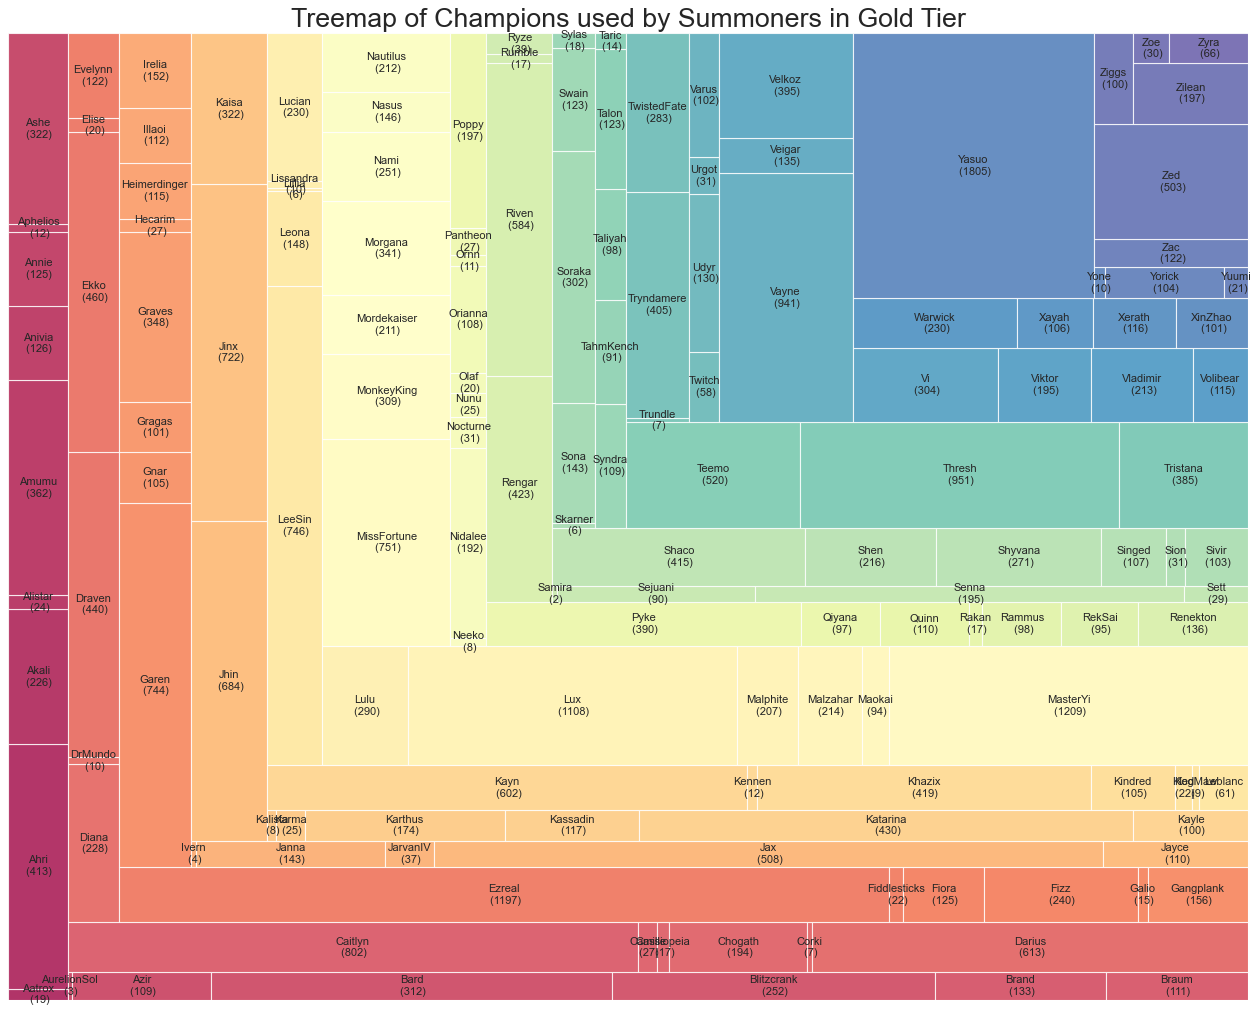

In [99]:
# Prepare Data
df = full_gold_df.groupby('Champion Name').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Full_Gold_Treemap.png")

In [80]:
platinum_combined_df = pd.merge(first_championID_list_plat_DF, champion_data_1, how = 'left', on = 'championId')
platinum_combined_df

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId,Champion Name
0,37,7,673126,1585886315000,651526,0,True,0,b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y,Sona
1,121,5,69908,1599794096000,48308,0,True,2,HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ,Khazix
2,59,6,72620,1590401842000,51020,0,True,1,u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-,JarvanIV
3,76,7,53396,1599539212000,31796,0,True,0,mV-w51K_z-T73eU3RktA3fLABBTpTVSZboKfXeUwrVZyne4l,Nidalee
4,8,7,156718,1601684389000,135118,0,True,0,45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW,Vladimir
...,...,...,...,...,...,...,...,...,...,...
95,145,6,44299,1601080016000,22699,0,True,1,reaW43gAy7-8FAD4ZN7O2joA0Fu3sBwZqCF1y4Cybjtb8IVC,Kaisa
96,51,7,96926,1599165379000,75326,0,True,0,4Kv241JNmDaGiWRoBR2oGjmcrQkLTv_qG7ndyjQZCdjttmfl,Caitlyn
97,120,5,57459,1593203889000,35859,0,True,2,QOSz4IRHVlID1uS76kdeLqq6Icd98t5zAyyGzoRCgdyBZwx1,Hecarim
98,145,6,50414,1603184272000,28814,0,True,1,tAqq0UDOqodGIpEQ9xtCFGJRLQO_7Q8mNXh_Ont-aYIybs3I,Kaisa


In [102]:
# Prepare Data
df2 = platinum_combined_df.groupby('Character Name').size().reset_index(name='counts')
labels = df2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df2['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Platinum_Treemap.png")

# Decorate
plt.title('Treemap of Champions used by Summoners in Platinum Tier')
plt.axis('off')
plt.show()

KeyError: 'Character Name'

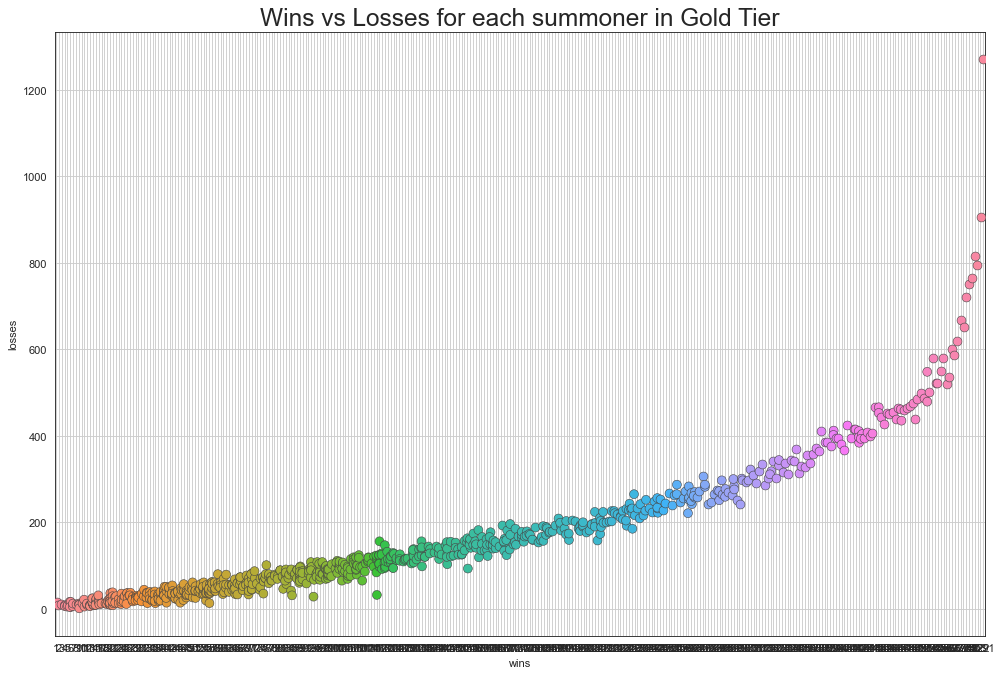

In [82]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_gold_df.wins, clean_gold_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Gold Tier', fontsize=22)
plt.show()

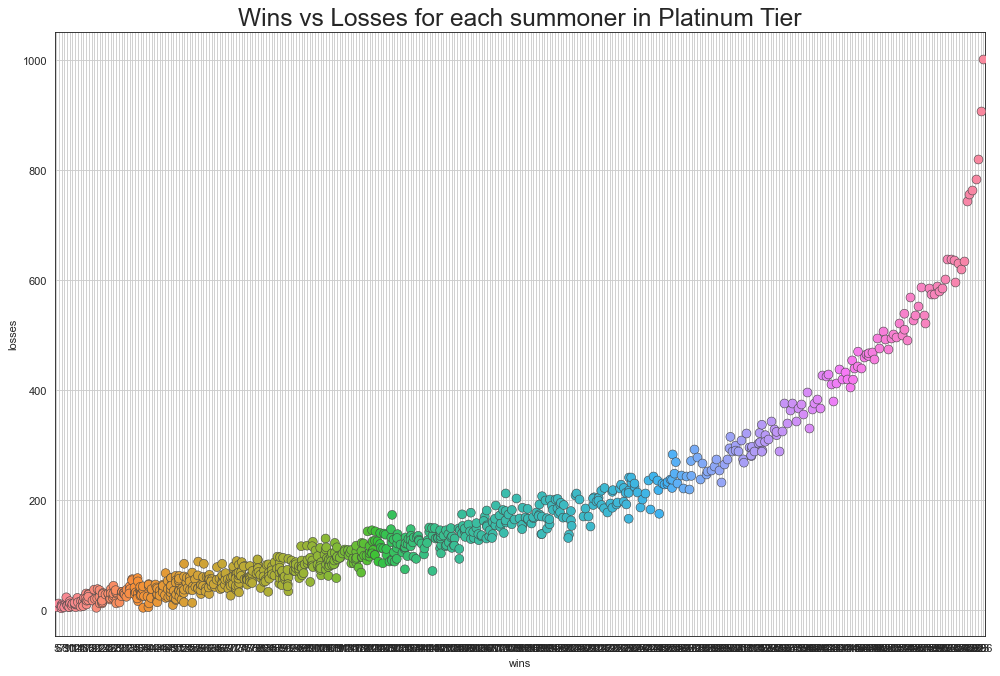

In [83]:
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_platinum_df.wins, clean_platinum_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Platinum Tier', fontsize=22)
plt.show()

In [86]:


total_champion_mastery = pd.read_csv('champion_mastery.csv')
total_subset = pd.read_csv('total_subset.csv')



total_combined_data = pd.merge(total_subset, total_champion_mastery, on = "summonerId", how = 'left')

champion_data_1['championId'] = champion_data_1['championId'].astype(float)

del total_combined_data["Unnamed: 0_x"]
del total_combined_data["Unnamed: 0_y"]

total_combined_data2 = pd.merge(total_combined_data, champion_data_1,  how = 'left', on = 'championId')


total_combined_data2.to_csv("summoner_champion.csv", index = False)

In [88]:
total_combined_data2.head()

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,...,miniSeries,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,Champion Name
0,e5f9632c-6f6d-4897-8ac7-d98d69fa2202,RANKED_SOLO_5x5,BRONZE,III,ss5zS6LtyMC4u5bs2sXClUfnGvKGzBuZi_ux_chm9RNVm3M,destroyall801,75,128,137,False,...,NaN,3.0,7.0,133279.0,1.595710e+12,111679.0,0.0,False,0.0,Galio
1,a4cfc131-0d4b-450a-b7db-b015bdea46e9,RANKED_SOLO_5x5,BRONZE,III,hAIhcHHlAHgYN3HYMiPUpYIQD4NzyUBCCNfit37sEQzKoLM,Dylan0615,57,6,7,False,...,NaN,11.0,7.0,36764.0,1.601860e+12,15164.0,0.0,True,0.0,MasterYi
2,d5b0028b-73b0-4a8d-aec9-4b865dda60c8,RANKED_SOLO_5x5,BRONZE,III,Xaf9gxaJ8t4JiVuwCXQsgiSihmoptwGqOv0PHh80zIuPrCE,huejazz1,100,236,233,False,...,"{'target': 2, 'wins': 1, 'losses': 1, 'progres...",16.0,5.0,724032.0,1.603430e+12,702432.0,0.0,True,2.0,Soraka
3,87cfff68-0ec9-4556-a317-d281e0b2000d,RANKED_SOLO_5x5,BRONZE,III,goYft0QzATXfa36vW-DVlz8axBI7_4U4JJQFRQn2cgB0Ah6e,Scrotie124,7,2,9,False,...,NaN,420.0,2.0,4477.0,1.596580e+12,2677.0,1523.0,True,0.0,Illaoi
4,b4b883b4-48ea-4d2d-bcf5-9e47d275893d,RANKED_SOLO_5x5,BRONZE,III,oKr1mFNkwzkv4ma3EY0GAKddlnYZ4vum0kLsZgZwVgga2WyL,OWA0Narwhal,13,54,67,False,...,NaN,497.0,7.0,200343.0,1.603080e+12,178743.0,0.0,True,0.0,Rakan
